#📌 Extracción

In [67]:
#Importación librerías e importación de datos
import pandas as pd
import requests
import numpy as np

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [68]:
#Información de las columnas y tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


**Diccionario de datos**
*   customerID: número de identificación único de cada cliente
*   Churn: si el cliente dejó o no la empresa
gender: género (masculino y femenino)
*   SeniorCitizen: información sobre si un cliente tiene 65 años o más
*   Partner: si el cliente tiene pareja o no
*   Dependents: si el cliente tiene dependientes o no
*   tenure: meses de contrato del cliente
*   PhoneService: suscripción de servicio telefónico
*   MultipleLines: suscripción a más de una línea de teléfono
*   InternetService: suscripción a un proveedor de internet
*   OnlineSecurity: suscripción adicional de seguridad online
*   OnlineBackup: suscripción adicional de backup online
*   DeviceProtection: suscripción adicional de protección en el dispositivo
*   TechSupport: suscripción adicional de soporte técnico, menos tiempo de espera
*   StreamingTV: suscripción de TV por cable
*   StreamingMovies: suscripción de streaming de películas
*   Contract: tipo de contrato
*   PaperlessBilling: si el cliente prefiere recibir la factura online
*   PaymentMethod: forma de pago
*   Charges.Monthly: total de todos los servicios del cliente por mes
*   Charges.Total: total gastado por el cliente

#🔧 Transformación

In [69]:
#normalizacion de los datos para llevar a la estructura del diccionario de datos
df = pd.json_normalize(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [70]:
df.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [71]:
# Limpieza de espacios en strings
def strip_strings(x):
    return x.strip() if isinstance(x, str) else x

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].map(strip_strings)

In [72]:
# Normalización de categorías
def normalize_categorical(x):
    if not isinstance(x, str):
        return x
    s = x.strip()
    specials = ["No internet service", "No phone service", "Fiber optic", "DSL"]
    if s in specials:
        return s
    mapping = {
        "yes": "Yes", "no": "No",
        "male": "Male", "female": "Female",
        "m": "Male", "f": "Female",
        "month-to-month": "Month-to-month",
        "one year": "One year", "two year": "Two year",
        "electronic check": "Electronic check",
        "mailed check": "Mailed check",
        "bank transfer (automatic)": "Bank transfer (automatic)",
        "credit card (automatic)": "Credit card (automatic)"
    }
    return mapping.get(s.lower(), s)

obj_cols = df.select_dtypes(include='object').columns
df[obj_cols] = df[obj_cols].map(normalize_categorical)

In [73]:
# Conversión de tipos numéricos
numeric_candidates = [
    "customer.SeniorCitizen",
    "customer.tenure",
    "account.Charges.Monthly",
    "account.Charges.Total"
]
for col in numeric_candidates:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [74]:
# Conversión de categóricas
cat_candidates = [c for c in df.select_dtypes(include='object').columns if c != "customerID"]
for c in cat_candidates:
    df[c] = df[c].astype('category')

In [75]:
# check de valores únicos en cada columna
for col in df.columns:
  print(f"valores únicos en la columna'{col}': {df[col].nunique()}")
  if df[col].nunique() < 50: # Imprima los valores solamente si no hay muchos
    print(df[col].unique())

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No', 'Yes', '']
Categories (3, object): ['', 'No', 'Yes']
valores únicos en la columna'customer.gender': 2
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
valores únicos en la columna'customer.Partner': 2
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
valores únicos en la columna'customer.Dependents': 2
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
valores únicos en la columna'phone.MultipleLines': 3
['No', 'Yes', 'No phone service']
Categories (3, object): ['No', 'No phone service', 'Yes']
valores únicos en la columna'internet.InternetService': 3
['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
valores únicos en la columna'intern

In [76]:
# Check de calidad de los datos

print("Shape del dataset:", df.shape)

# Nulos
print("\nNulos por columna:")
print(df.isna().sum()[df.isna().sum() > 0])

# Duplicados
if "customerID" in df.columns:
    print("\nDuplicados por customerID:", df["customerID"].duplicated().sum())
    df = df.drop_duplicates(subset=["customerID"], keep="first")

# Tipos de datos
print("\nTipos de datos:")
print(df.dtypes.head(20))

# Distribución de la variable objetivo (Churn)
if "Churn" in df.columns:
    print("\nDistribución de Churn:")
    print(df["Churn"].value_counts(normalize=True))

Shape del dataset: (7267, 21)

Nulos por columna:
account.Charges.Total    11
dtype: int64

Duplicados por customerID: 0

Tipos de datos:
customerID                     object
Churn                        category
customer.gender              category
customer.SeniorCitizen          int64
customer.Partner             category
customer.Dependents          category
customer.tenure                 int64
phone.PhoneService           category
phone.MultipleLines          category
internet.InternetService     category
internet.OnlineSecurity      category
internet.OnlineBackup        category
internet.DeviceProtection    category
internet.TechSupport         category
internet.StreamingTV         category
internet.StreamingMovies     category
account.Contract             category
account.PaperlessBilling     category
account.PaymentMethod        category
account.Charges.Monthly       float64
dtype: object

Distribución de Churn:
Churn
No     0.711986
Yes    0.257190
       0.030824
Name: prop

#📊 Carga y análisis

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de los gráficos
sns.set(style="whitegrid", palette="Set2")


## Distribución de variables relevantes -churn, género, tenure y cargos/mes

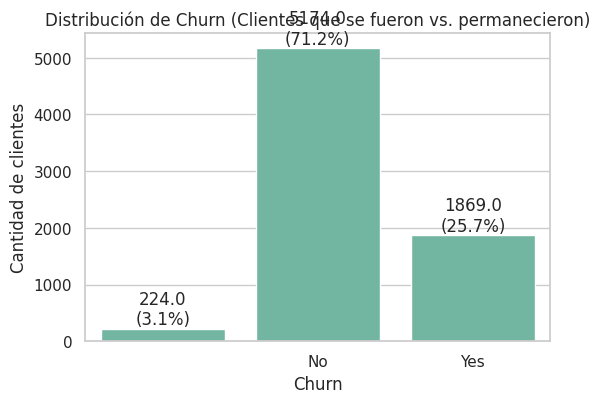

In [78]:
# 1.Distribución general de Churn

plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x="Churn")
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total
    ax.annotate(f'{height}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.title("Distribución de Churn (Clientes que se fueron vs. permanecieron)")
plt.xlabel("Churn")
plt.ylabel("Cantidad de clientes")
plt.show()

/tmp/ipython-input-4152090290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="customer.gender", palette="Set2")


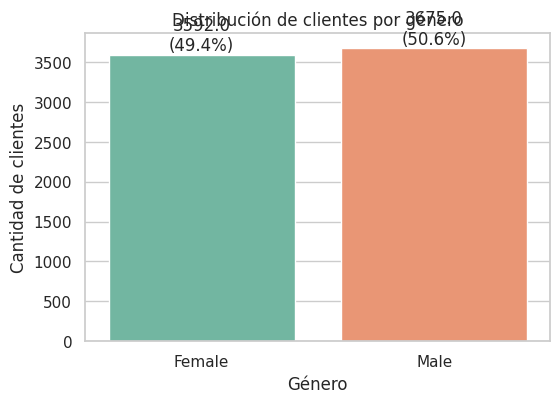

In [79]:
# 2. Distribución por género
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x="customer.gender", palette="Set2")
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total
    ax.annotate(f'{height}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.title("Distribución de clientes por género")
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.show()

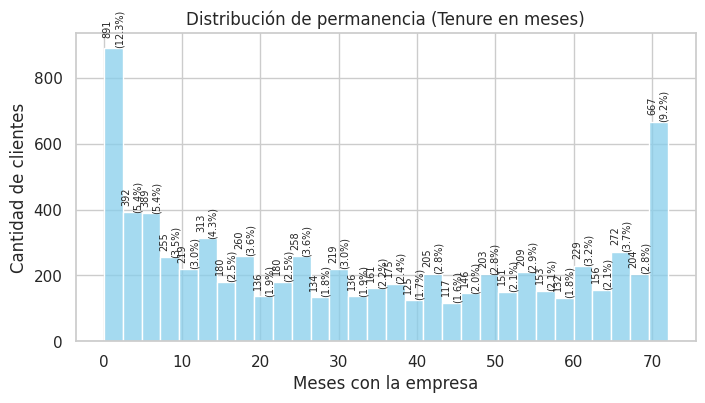

In [80]:
# 3. Distribución de Tenure (meses con la empresa)
plt.figure(figsize=(8,4))
ax = sns.histplot(data=df, x="customer.tenure", bins=30, kde=False, color="skyblue")
total = len(df)
# Etiquetas cada 10 bins aprox
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        percentage = 100 * height / total
        ax.annotate(f'{height}\n({percentage:.1f}%)',
                    (patch.get_x() + patch.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=7, rotation=90)
plt.title("Distribución de permanencia (Tenure en meses)")
plt.xlabel("Meses con la empresa")
plt.ylabel("Cantidad de clientes")
plt.show()

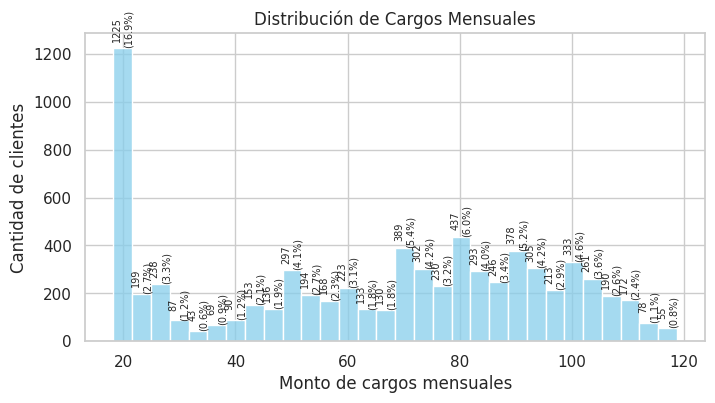

In [81]:
# --- 4. Distribución de Cargos Mensuales ---
plt.figure(figsize=(8,4))
ax = sns.histplot(data=df, x="account.Charges.Monthly", bins=30, kde=False, color="skyblue")
total = len(df)
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        percentage = 100 * height / total
        ax.annotate(f'{height}\n({percentage:.1f}%)',
                    (patch.get_x() + patch.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=7, rotation=90)
plt.title("Distribución de Cargos Mensuales")
plt.xlabel("Monto de cargos mensuales")
plt.ylabel("Cantidad de clientes")
plt.show()

## Comparación de variables con churn

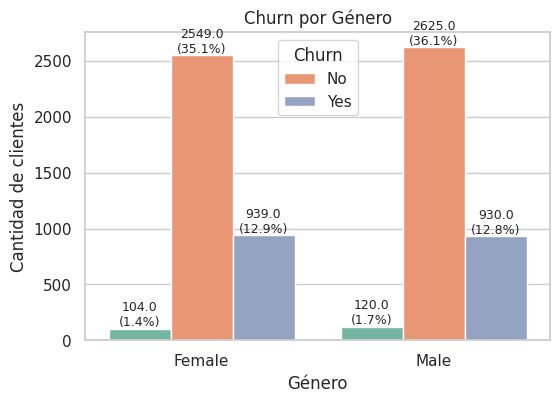

In [82]:
# 1. Churn por género
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x="customer.gender", hue="Churn", palette="Set2")
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = 100 * height / total
        ax.annotate(f'{height}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)
plt.title("Churn por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.show()

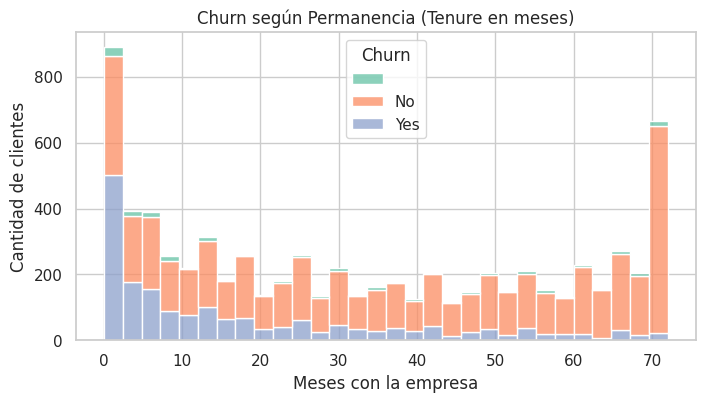

In [83]:
# 2. Churn por Tenure
plt.figure(figsize=(8,4))
ax = sns.histplot(data=df, x="customer.tenure", hue="Churn", bins=30, multiple="stack", palette="Set2")
plt.title("Churn según Permanencia (Tenure en meses)")
plt.xlabel("Meses con la empresa")
plt.ylabel("Cantidad de clientes")
plt.show()

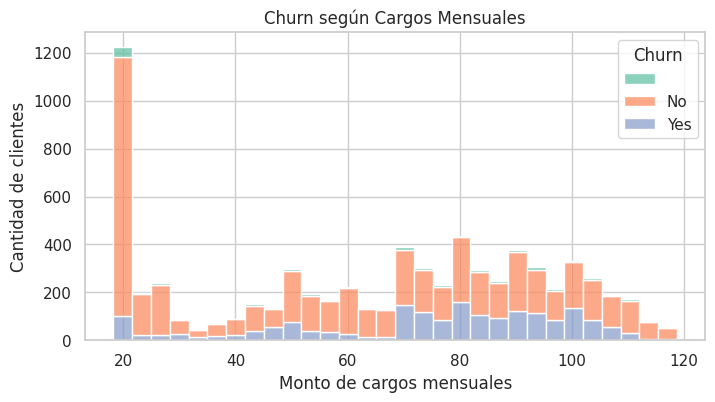

In [84]:
# --- 3. Churn por Cargos Mensuales ---
plt.figure(figsize=(8,4))
ax = sns.histplot(data=df, x="account.Charges.Monthly", hue="Churn", bins=30, multiple="stack", palette="Set2")
plt.title("Churn según Cargos Mensuales")
plt.xlabel("Monto de cargos mensuales")
plt.ylabel("Cantidad de clientes")
plt.show()

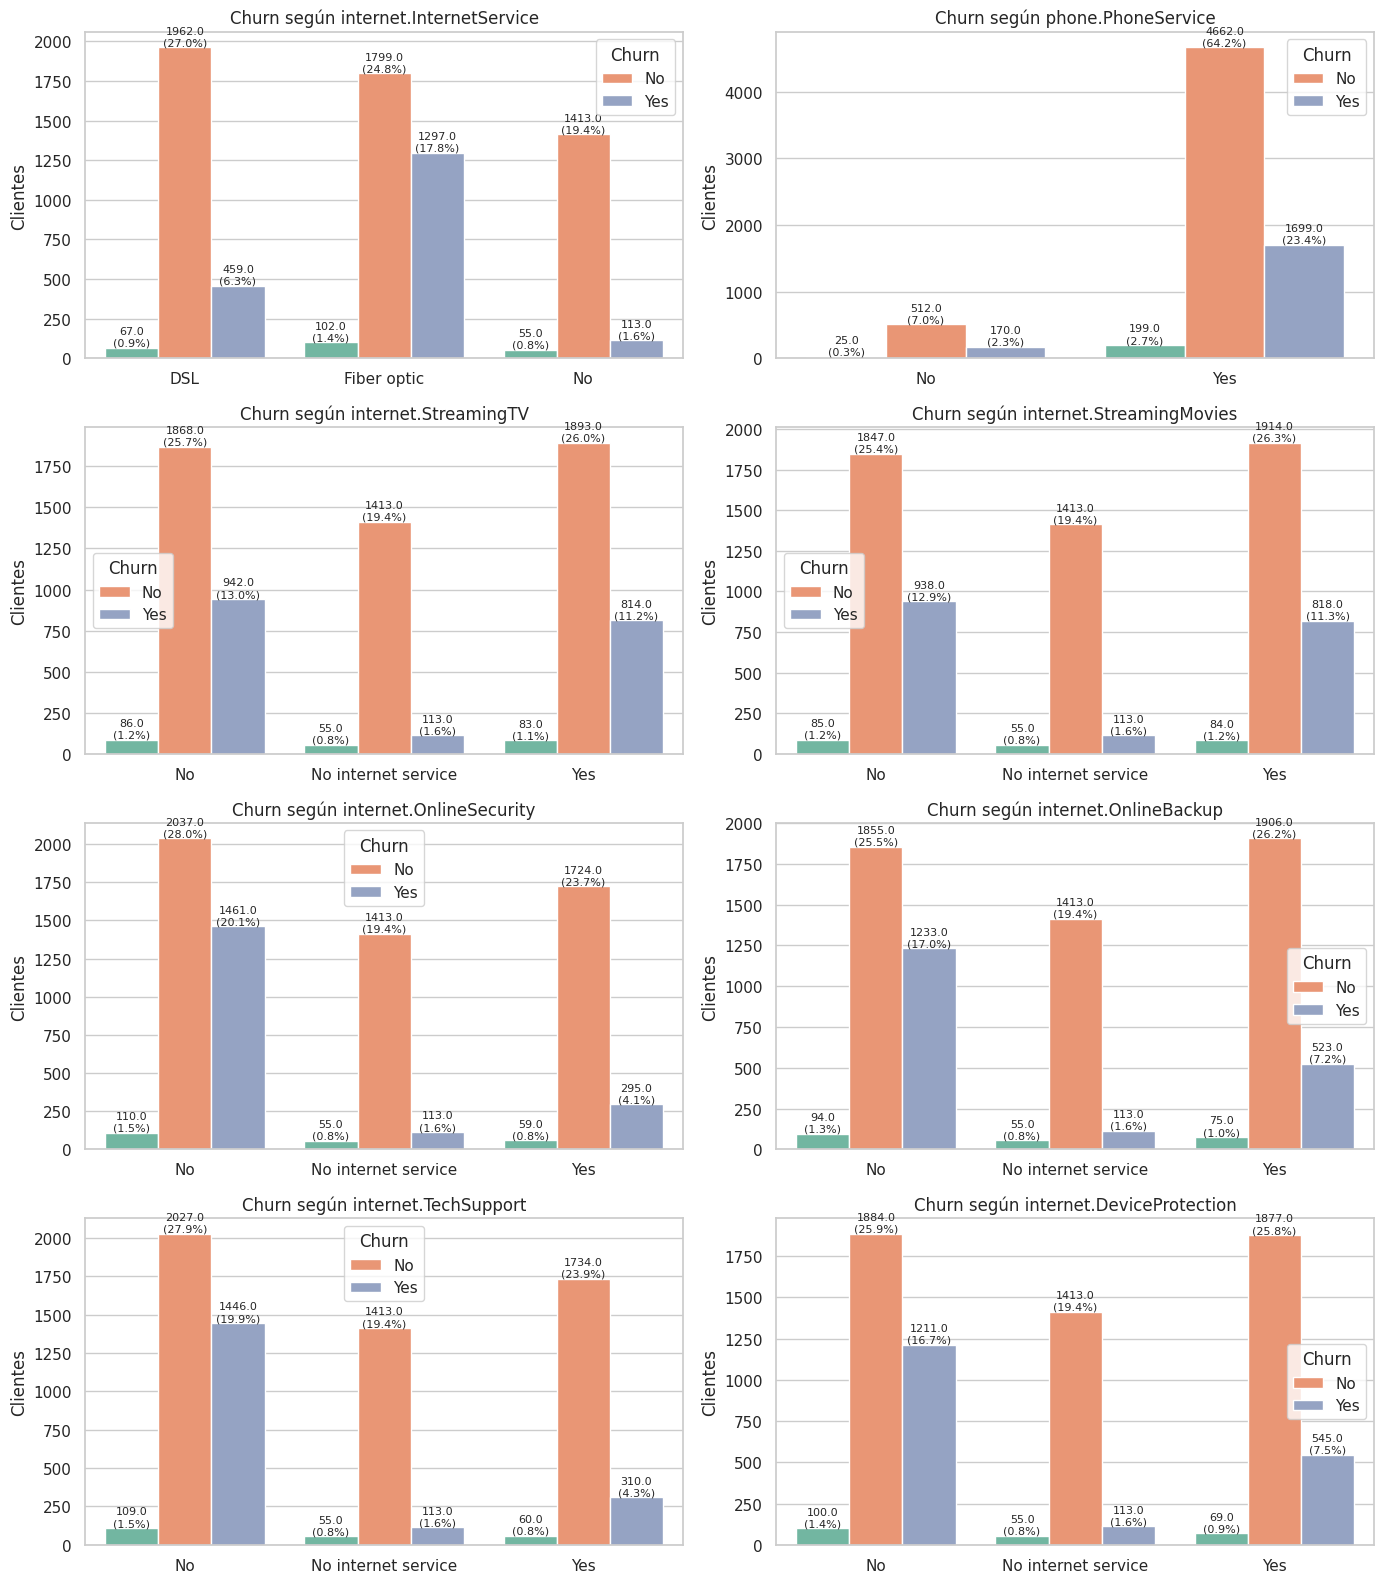

In [85]:
# --- Comparación de churn según servicios contratados ---
servicios = ["internet.InternetService", "phone.PhoneService", "internet.StreamingTV", "internet.StreamingMovies",
             "internet.OnlineSecurity", "internet.OnlineBackup", "internet.TechSupport", "internet.DeviceProtection"]

fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

for i, servicio in enumerate(servicios):
    ax = sns.countplot(data=df, x=servicio, hue="Churn", palette="Set2", ax=axes[i])
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percentage = 100 * height / total
            ax.annotate(f'{height}\n({percentage:.1f}%)',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8)
    ax.set_title(f"Churn según {servicio}")
    ax.set_xlabel("")
    ax.set_ylabel("Clientes")

plt.tight_layout()
plt.show()

## Preparación datos para aplicar test de churn contra variables

In [86]:
# --- Limpieza y preparación de datos ---

# Eliminamos espacios en blanco en strings
def strip_strings(x):
    if isinstance(x, str):
        return x.strip()
    return x

df = df.applymap(strip_strings)

# Reemplazamos valores vacíos en Churn por NaN
df["Churn"] = df["Churn"].replace("", np.nan)

# Creamos variable binaria de churn (0 = No, 1 = Yes)
df["Churn_bin"] = df["Churn"].map({"No": 0, "Yes": 1})

# Rellenamos valores faltantes en Total Charges con 0 (corrige SettingWithCopyWarning)
df.loc[:, "account.Charges.Total"] = df["account.Charges.Total"].fillna(0)

# Identificamos tipos de variables
categorical_vars = df.select_dtypes(include=["object", "category"]).columns.tolist()
numeric_vars = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Variables categóricas:", categorical_vars)
print("Variables numéricas:", numeric_vars)

# Verificación final de valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Variables categóricas: ['customerID', 'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'Churn_bin']
Variables numéricas: ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

Valores faltantes por columna:
customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection   

/tmp/ipython-input-690368404.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(strip_strings)
/tmp/ipython-input-690368404.py:12: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["Churn"] = df["Churn"].replace("", np.nan)


In [87]:
# Ajustes adicionales: eliminación churn sin datos y eliminación  ID

# Eliminar filas con churn faltante
df = df.dropna(subset=["Churn"])

# Eliminar columna customerID que no aporta
df = df.drop(columns=["customerID"])

# Verificación datos posterior
print("Tamaño del dataset después de limpieza:", df.shape)
print("Valores faltantes por columna:")
print(df.isnull().sum())

Tamaño del dataset después de limpieza: (7043, 21)
Valores faltantes por columna:
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
Churn_bin                    0
dtype: int64


In [88]:
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Churn_bin
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,1


In [89]:
df.to_csv('datos_limpios.csv', index=False)

##Evaluación de variables con mayor correlación con el churn

In [90]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind

# Garantizar Churn limpio y crear/recrear Churn_bin
# Normaliza valores de Churn y elimina filas sin etiqueta
df["Churn"] = df["Churn"].astype(str).str.strip().replace({"yes":"Yes","no":"No"})
df = df[df["Churn"].isin(["Yes","No"])].copy()

# Crear/recrear columna binaria (0 = No, 1 = Yes) y asegurar tipo numérico
df["Churn_bin"] = df["Churn"].map({"No": 0, "Yes": 1}).astype("int8")

# 1) RANKING: variables numéricas vs Churn (correlación)
num_cols = [c for c in ["customer.SeniorCitizen",
                        "customer.tenure",
                        "account.Charges.Monthly",
                        "account.Charges.Total"] if c in df.columns]

# Correlaciones con Churn_bin (mayor = más asociado, signo indica dirección)
corrs = df[num_cols + ["Churn_bin"]].corr(numeric_only=True)["Churn_bin"].sort_values(ascending=False)
print("=== Correlaciones numéricas con Churn_bin ===")
print(corrs)

# (Opcional) test t para diferencia de medias entre churn=1 y churn=0
num_ranking = []
for col in num_cols:
    yes = df.loc[df["Churn_bin"]==1, col].dropna()
    no  = df.loc[df["Churn_bin"]==0, col].dropna()
    stat, pval = ttest_ind(yes, no, equal_var=False)
    num_ranking.append((col, pval, yes.mean(), no.mean()))
num_ranking = pd.DataFrame(num_ranking, columns=["Variable","p_value","Media_Churn1","Media_Churn0"]).sort_values("p_value")
print("\n=== Test de medias (numéricas) ordenado por p-value ===")
print(num_ranking)

# 2) RANKING: variables categóricas vs Churn (chi-cuadrado)
# Categóricas de tipo 'object' o 'category' se excluyen
cat_cols = [c for c in df.select_dtypes(include=["object","category"]).columns if c not in ["Churn"]]

chi2_rows = []
for col in cat_cols:
    # Saltar columnas con una sola categoría o tablas degeneradas
    if df[col].nunique(dropna=True) <= 1:
        continue
    table = pd.crosstab(df[col], df["Churn_bin"])
    if table.shape[1] != 2:  # debe tener las dos clases 0 y 1
        continue
    chi2, p, dof, ex = chi2_contingency(table)
    chi2_rows.append((col, p, chi2, dof, int(table.to_numpy().sum())))

cat_rank = pd.DataFrame(chi2_rows, columns=["Variable","p_value","chi2","dof","n"]).sort_values("p_value")
print("\n=== Chi-cuadrado (categóricas) ordenado por p-value ===")
print(cat_rank)

=== Correlaciones numéricas con Churn_bin ===
Churn_bin                  1.000000
account.Charges.Monthly    0.193356
customer.SeniorCitizen     0.150889
account.Charges.Total     -0.198324
customer.tenure           -0.352229
Name: Churn_bin, dtype: float64

=== Test de medias (numéricas) ordenado por p-value ===
                  Variable        p_value  Media_Churn1  Media_Churn0
1          customer.tenure  1.195495e-232     17.979133     37.569965
3    account.Charges.Total   5.902581e-75   1531.796094   2549.911442
2  account.Charges.Monthly   8.592449e-73     74.441332     61.265124
0   customer.SeniorCitizen   3.587587e-29      0.254682      0.128721

=== Chi-cuadrado (categóricas) ordenado por p-value ===
                     Variable        p_value         chi2  dof     n
12           account.Contract  5.863038e-258  1184.596572    2  7043
6     internet.OnlineSecurity  2.661150e-185   849.998968    2  7043
9        internet.TechSupport  1.443084e-180   828.197068    2  7043
5 

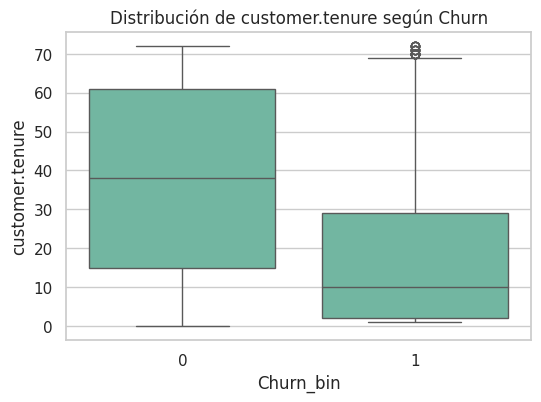

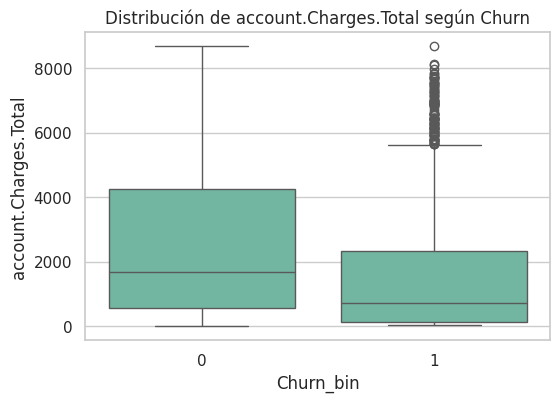

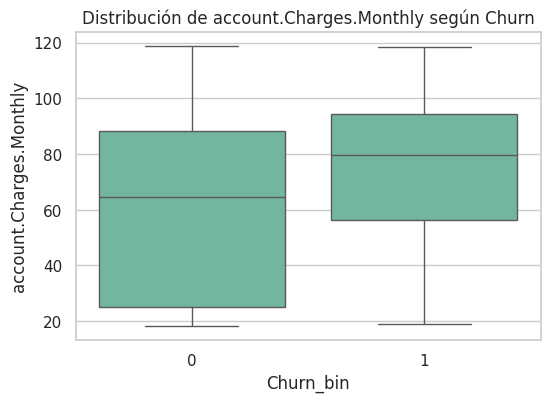

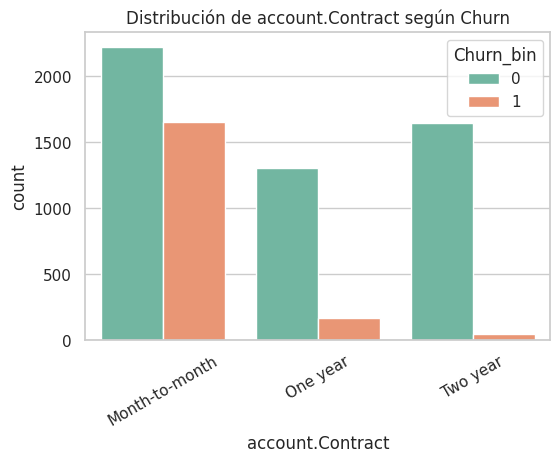

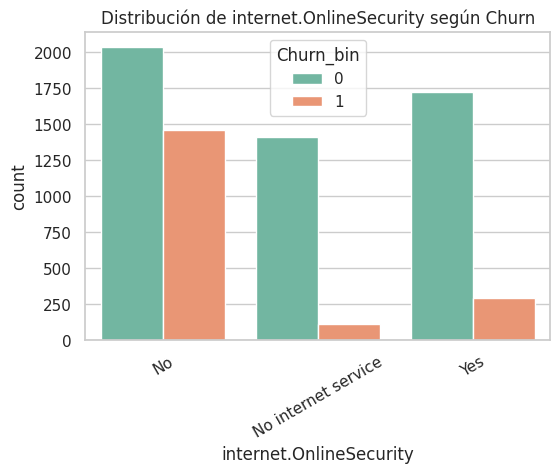

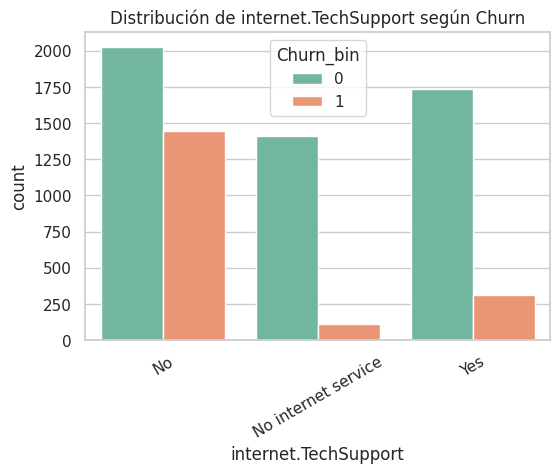

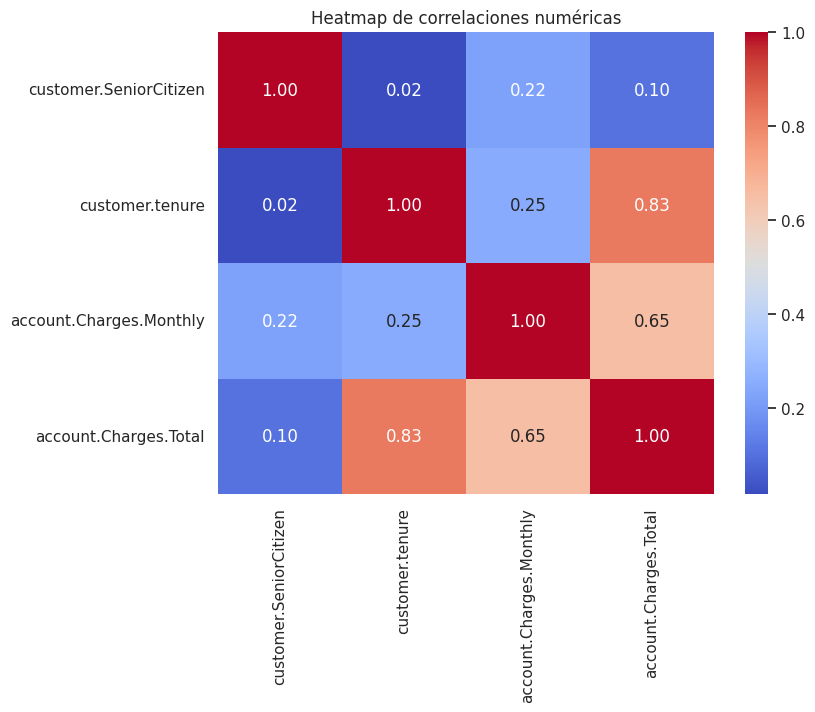

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Boxplots para numéricas clave ---
top_num = num_ranking.head(3)["Variable"].tolist()
for col in top_num:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Churn_bin", y=col, data=df)
    plt.title(f"Distribución de {col} según Churn")
    plt.show()

# --- Barplots para categóricas clave ---
top_cat = cat_rank.head(3)["Variable"].tolist()
for col in top_cat:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Churn_bin", data=df)
    plt.title(f"Distribución de {col} según Churn")
    plt.xticks(rotation=30)
    plt.show()

# --- Heatmap de correlación ---
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap de correlaciones numéricas")
plt.show()


#📄Informe final

## Telecom X - Análisis de cancelación (Churn) de Clientes

Con el objetivo de enfrentar la alta tasa de cancelación de clientes se realizó un Análisis exploratorio de los datos y se evaluaron las relaciones entre variables que se consideraron posibles factores explicativos usando pruebas estadísticas distintas para un conjunto de variables numéricas y categoriales.

## Relación entre "Churn", tenure, seniority, cargos mensuales y cargos totales

**Conclusión preliminar: la correlación indica que la antigüedad y gasto acumulado retienen a los clientes, mientras que los planes caros (gasto mensual) y la condición de adulto mayor elevan la fuga. El análisis de medias completa el análisis en el mismo sentido: clientes nuevos con cargos mensuales altos y adultos mayores tienen más propensión al churn.**

Base del análisis (Correlaciones y test de medias):

•	customer.tenure (-0.35) → Es la variable con más correlación (negativa) de las analizadas. La relación inversa indica que a mayor antiguedad en la empresa, churnean menos.

•	account.Charges.Total (-0.20) → Clientes que han gastado más a lo largo del tiempo churnean menos. Si un cliente ha estado más tiempo es esperable un gasto acumulado alto, eso tal vez le significa un costo hundido, o que al estar satisfecho a continuado en la empresa.

•	account.Charges.Monthly (+0.19) → Indicaría que a mayor gasto mensual, más probabilidad de churn. Podría suponerse que alguien que gasta más por mes estará más abierto a buscar otras alternativas con otros proveedores. A su vez las compañías deben tener intensas campañas para "robarse" los clientes de mayor gasto mensual.

•	customer.SeniorCitizen (+0.15) → Los adultos mayores tendrían más churn que los no mayores. Este punto ameritaría una investigación de mayor profundidad, tal vez segmentando en categorías de edad para idenfificar patrones más precisos. Sería interesante tener información sobre niveles de ingresos estimados o saber qué proporción son jubilados.

El análisis de medias completa el análisis en el mismo sentido (variable, media churn = 1, media churn = 0)

- customer.tenure: 18 versus	38
- account.Charges.Total:	1532	versus 2550
- account.Charges.Monthly:	74 versus 61
- customer.SeniorCitizen:	0.25 versus 0.13


## Relación entre "Churn" y variables categóricas

**Conclusión preliminar: a partir del test de chi cuadrado se puede ver las categorías como contratos más largos, tener varios servicios y pago con métodos facilitadores favorecen la retención mientras que la contratación mensual, ser solo, usar la facturación electrónica y fibra óptica se asocian con el riesgo de churn .**

- 1.	account.Contract (p ≈ 0)
⟶ El tipo de contrato es el factor más fuerte.
o	Contratos mensuales tienen muchísimo más churn.
o	Contratos anuales o bianuales retienen clientes.
- 2.	internet.OnlineSecurity, internet.TechSupport, internet.OnlineBackup, internet.DeviceProtection
⟶ Los clientes con servicios adicionales (seguridad, soporte, backup, protección) churnean mucho menos.
- 3.	internet.InternetService
⟶ El tipo de servicio de internet (DSL, fibra, ninguno) influye mucho. Normalmente la fibra óptica se asocia a mayor churn en este dataset.
- 4.	account.PaymentMethod
⟶ Ciertos métodos de pago (ej: tarjeta de crédito automática) retienen más que otros (ej: cheque electrónico).
- 5.	account.PaperlessBilling
⟶ La facturación sin papel está asociada a más churn.
- 6.	customer.Partner y customer.Dependents
⟶ Clientes que viven solos o sin dependientes churnean más.
(El vínculo familiar se asocia con permanencia).
- 7.	Variables de menor importancia: phone.MultipleLines (débil), phone.PhoneService y customer.gender (no significativos).


## **Recomendaciones a la empresa**


- Incentivar el establecimiento de contratos de largo plazo, dada la importancia de la correlación inversa entre churn y antiguedad con la empresa y el efecto perjudicial de los contratos mensuales (mayor churn).

- Desarrollar promociones o estrategias de fidelización para quienes enfrentan altos cargos mensuales, especialmente para los clientes nuevos.

- Promover paquetes con múltiples servicios, ya que se observó menor abandono entre clientes con mayor cantidad de servicios contratados.

- En el mismo sentido promover aquellos métodos de pago que presentan mayor retención como la tarjeta de crédito automática.

- Priorizar acciones sobre clientes sin pareja pues muestran una mayor tendencia al churn. Tal vez presentando planes atractivos para personas solas, o permitiendo el armado de "grupos" de amigos o referidos.

- Profundizar el seguimiento de los adultos mayores para detectar a aquellos en riesgo de abandono y poder ofrecerles algún beneficio que los retenga.
